Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**Hands-on Activity .81** | Saving Models
**Name** | Abad, Julia Marie Iberet
**Section** | CPE32S3
**Date Performed**: | April 16, 2024
**Date Submitted**: | April 19, 2024
**Instructor**: | Engr. Roman Richard



#Instructions:

1. Choose any dataset applicable to either a classification problem or a regression problem. <br>
2. Explain your datasets and the problem being addressed. <br>
3. Show evidence that you can do the following:<br>
a. Save a model in HDF5 format<br>
b.Save a model and load the model in a JSON format<br>
c. Save a model and load the model in a YAML format<br>
d. Checkpoint Neural Network Model Improvements<br>
e. Checkpoint Best Neural Network Model only<br>
f. Load a saved Neural Network model<br>
g. Visualize Model Training History in Keras<br>
h. Show the application of Dropout Regularization<br>
i. Show the application of Dropout on the visible layer<br>
j. Show the application of Dropout on the hidden layer<br>
k. Show the application of a time-based learning rate schedule<br>
l.Show the application of a drop-based learning rate schedule<br>

Submit a well-prepared notebook for your report<br>
Include conclusion or learning

#About the Dataset

Link of the Dataset: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

##Dataset Information
Among  the certified rice grown in TURKEY,  the  Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study.  When  looking  at  the  general  characteristics  of  Osmancik species, they have a wide, long, glassy and dull appearance.  When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance.  A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice. <br>

**Has Missing Values?**

No

##Variables Table
| Variable Name      | Role   | Type       | Description                                                            | Units | Missing Values |
|--------------------|--------|------------|------------------------------------------------------------------------|-------|----------------|
| Area               | Feature| Integer    | Returns the number of pixels within the boundaries of the rice grain   | px    | no             |
| Perimeter          | Feature| Continuous | Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain | px | no             |
| Major_Axis_Length  | Feature| Continuous | The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives |        | no             |
| Minor_Axis_Length  | Feature| Continuous | The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives |        | no             |
| Eccentricity       | Feature| Continuous | It measures how round the ellipse, which has the same moments as the rice grain, is |        | no             |
| Convex_Area        | Feature| Integer    | Returns the pixel count of the smallest convex shell of the region formed by the rice grain |        | no             |
| Extent             | Feature| Continuous | Returns the ratio of the region formed by the rice grain to the bounding box |        | no             |
| Class              | Target | Binary     | Cammeo and Osmancik                                                    |        | no             |

**Target/Dependent Variable:** Class <br>

**Independent Variables:** Area, Perimeter, Major_Axis_Length, Minor_Axis_Length,Eccentricity, Convex_Area, and Extent

##Problem being addressed
This daataset addresses the problem of classifying rice grains into two classes: Cammeo and Osmancik. The dataset provides morphological features of rice grains that are used to differentiate between the two rice species based on their physical characteristics.<br>

In essence, the problem being addressed by this dataset is a classification problem where the goal is to build a model that can accurately classify rice grains into the correct species (Cammeo or Osmancik) based on their morphological attributes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, History
import matplotlib.pyplot as plt
import math

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [ ]:
filepath = "https://archive.ics.uci.edu/static/public/545/data.csv"
data = pd.read_csv(filepath)

In [ ]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
data.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709992,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [ ]:
data.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [ ]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
data['Class'] = data['Class'].replace({'Cammeo': 0, 'Osmancik': 1})
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0


In [ ]:
data.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,1
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,1
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,1
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,1
3809,11434,404.709992,161.079269,90.868195,0.825692,11591,0.802949,1


In [ ]:
data.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area            int64
Extent               float64
Class                  int64
dtype: object

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Analysis
 The data is relatively clean with no missing values, and all features are in numeric format except for the target variable, which has been encoded to binary values. Upon examining the descriptive statistics, the features have varying ranges and distributions.

 In preparation for modeling, the data has been split into training and testing sets. Additionally, standard scaling has been applied to the features to ensure that they are on a similar scale. Overall, this dataset seems suitable for classification tasks aimed at distinguishing between Cammeo and Osmancik rice varieties based on their morphological features.


#a. Save a model in HDF5 format:

In [ ]:
pip install h5py

In [ ]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('best_rice_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
model.fit(X_train_scaled, y_train, epochs=150, validation_data=(X_test_scaled, y_test))

Epoch 1/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6546 - loss: 0.6789 - val_accuracy: 0.8858 - val_loss: 0.3385
Epoch 2/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9036 - loss: 0.2965 - val_accuracy: 0.9121 - val_loss: 0.2257
Epoch 3/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9178 - loss: 0.2240 - val_accuracy: 0.9252 - val_loss: 0.1929
Epoch 4/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9240 - loss: 0.1933 - val_accuracy: 0.9239 - val_loss: 0.1807
Epoch 5/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9195 - loss: 0.1922 - val_accuracy: 0.9291 - val_loss: 0.1758
Epoch 6/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9209 - loss: 0.1914 - val_accuracy: 0.9265 - val_loss: 0.1735
Epoch 7/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.1918 - val_accuracy: 0.9239 - val_loss: 0.1732
Epoch 8/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.1956 - val_accuracy: 0.9278 - 

In [ ]:
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

compile_metrics: 42.78%


In [ ]:
model.save('rice_model.h5')

In [ ]:
rice_model = load_model('rice_model.h5')

rice_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211 (848.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

##Analysis

For the model structure of this dataset the model architecture consists of three dense layers, one input layer with 12 neurons, one hidden layer with 8 neurons, and one output layer with a single neuron using a sigmoid activation function.  The model's training progresses across epochs, with both training and validation accuracy improving steadily, which indicates that the model is learning well from the training data without overfitting too much. Overall, the model demonstrates effective training, decent performance on validation data, and good practices in terms of model saving and loading.

#b.Save a model and load the model in a JSON format


In [ ]:
model_json = model.to_json()
with open("rice_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
json_file = open('rice_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
loaded_model.fit(X_train_scaled, y_train, epochs=500, batch_size=10, verbose=1)

Epoch 1/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8867 - loss: 0.4549
Epoch 2/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9316 - loss: 0.1857
Epoch 3/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.1915
Epoch 4/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9264 - loss: 0.1885
Epoch 5/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.1886
Epoch 6/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9255 - loss: 0.1963
Epoch 7/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9352 - loss: 0.1779
Epoch 8/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.1748
Epoch 9/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9327 - loss: 0.1892
Epoch 10/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9311 - loss: 0.1932
Epoch 11/500
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9299 - loss: 0.1891
Epoch 12/500
305/305 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
score = loaded_model.evaluate(X_test_scaled, y_test, verbose=0)
print("Loaded model accuracy: %.2f%%" % (score[1] * 100))

Loaded model accuracy: 93.04%


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.003), metrics=['accuracy'])

In [ ]:
import json

with open("rice_model.json", "r") as json_file:
    model_json_content = json_file.read()

parsed_json = json.loads(model_json_content)
pretty_json = json.dumps(parsed_json, indent=4)

print(pretty_json)

{
    "module": "keras",
    "class_name": "Sequential",
    "config": {
        "name": "sequential_5",
        "trainable": true,
        "dtype": "float32",
        "layers": [
            {
                "module": "keras.layers",
                "class_name": "InputLayer",
                "config": {
                    "batch_shape": [
                        null,
                        7
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "name": "input_layer_2"
                },
                "registered_name": null
            },
            {
                "module": "keras.layers",
                "class_name": "Dense",
                "config": {
                    "name": "dense_6",
                    "trainable": true,
                    "dtype": "float32",
                    "units": 12,
                    "activation": "relu",
                    "use_bias": true,
                    "kernel

##Analysis
The model is first created and trained using the Sequential model class then saved to a JSON file and loaded back into memory for further evaluation. The model is trained using the Adam optimizer with a learning rate of 0.001 for 500 epochs.

During training, the model achieves an accuracy of 93.04% on the test data, indicating good performance in classifying rice samples. Adjustments to hyperparameters like the learning rate could potentially impact the model's performance, highlighting the importance of hyperparameter tuning in machine learning tasks.



#c. Save a model and load the model in a YAML format

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=150, batch_size=10, verbose=0)

scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 92.81%


In [ ]:
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
print("Saved model architecture to disk in YAML format")

Saved model architecture to disk in YAML format


In [ ]:
model.save_weights("model_.weights.weights.h5")
print("Saved model weights to disk")

Saved model weights to disk


In [ ]:
with open("model.yaml", "r") as yaml_file:
    loaded_model_yaml = yaml_file.read()
loaded_model = model_from_json(loaded_model_yaml)
print("Loaded model architecture from disk")

Loaded model architecture from disk


In [ ]:
loaded_model.load_weights("model_weights.h5")
print("Loaded model weights from disk")

Loaded model weights from disk


##Analysis
In this part, I saved its architecture in YAML format, its weights, and then loading the model architecture back from disk. The model is compiled using binary crossentropy loss, the Adam optimizer, and accuracy as the evaluation metric. In training the data, it achieved an accuracy of 92.81% indicating that the model performs reasonably well on the training data.


#d. Checkpoint Neural Network Model Improvements

In [ ]:
filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=[checkpoint], verbose=1)

Epoch 1/100
216/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6955 - loss: 1.8472
Epoch 1: val_accuracy improved from -inf to 0.91639, saving model to weights-improvement-01-0.92.keras
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7095 - loss: 1.7280 - val_accuracy: 0.9164 - val_loss: 0.2353
Epoch 2/100
243/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.2225
Epoch 2: val_accuracy improved from 0.91639 to 0.91967, saving model to weights-improvement-02-0.92.keras
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9221 - loss: 0.2226 - val_accuracy: 0.9197 - val_loss: 0.2103
Epoch 3/100
235/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9182 - loss: 0.2314
Epoch 3: val_accuracy improved from 0.91967 to 0.92295, saving model to weights-improvement-03-0.92.keras
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9185 - loss: 0.2305 - val_accuracy: 0.9230 - val_loss: 0.2018
Epoch 4/100
235/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 -

##Analysis
The model starts with an accuracy of around 70% and a loss of about 1.7 on the training set in the first epoch.The validation accuracy improves rapidly from around 91% to over 92% within the first few epochs. The model continues training for 100 epochs but doesn't seem to improve significantly beyond the early epochs in terms of validation accuracy. There are fluctuations in both training and validation accuracy and loss throughout the training process, indicating some level of model instability or sensitivity to the training data.

Overall, the model achieves a reasonably good validation accuracy of around 92% but doesn't show significant improvement or stabilization beyond that point.








#e. Checkpoint Best Neural Network Model only


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
filepath = "weights.best.hdf5..keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.92295, saving model to weights.best.hdf5..keras

Epoch 2: val_accuracy did not improve from 0.92295

Epoch 3: val_accuracy did not improve from 0.92295

Epoch 4: val_accuracy improved from 0.92295 to 0.92787, saving model to weights.best.hdf5..keras

Epoch 5: val_accuracy did not improve from 0.92787

Epoch 6: val_accuracy did not improve from 0.92787

Epoch 7: val_accuracy did not improve from 0.92787

Epoch 8: val_accuracy did not improve from 0.92787

Epoch 9: val_accuracy did not improve from 0.92787

Epoch 10: val_accuracy did not improve from 0.92787

Epoch 11: val_accuracy did not improve from 0.92787

Epoch 12: val_accuracy did not improve from 0.92787

Epoch 13: val_accuracy did not improve from 0.92787

Epoch 14: val_accuracy did not improve from 0.92787

Epoch 15: val_accuracy did not improve from 0.92787

Epoch 16: val_accuracy did not improve from 0.92787

Epoch 17: val_accuracy did not improve from 0.92787

Epoch 18: val_accu

##Analysis

The ModelCheckpoint callback triggers model saving at epochs 1, 4, and 84, corresponding to validation accuracies of 92.3%, 92.8%, and 92.9%, respectively. These checkpoints capture incremental improvements in validation accuracy. The lack of substantial progress in validation accuracy after the early epochs may be a cause of potential challenges such as model overfitting or data limitations.

#f. Load a saved Neural Network model


In [ ]:
model.load_weights("weights.best.hdf5..keras")

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Loaded model accuracy: %.2f%%" % (score[1] * 100))

Loaded model accuracy: 92.65%


##Analysis
Loaded the weights of the best-performing model saved during training and evaluating this model's accuracy on a separate test dataset. The loaded model achieves an accuracy of 92.65% on the test data, indicating that the model's performance generalizes well beyond the training data.


#g. Visualize Model Training History in Keras


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, batch_size=10, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


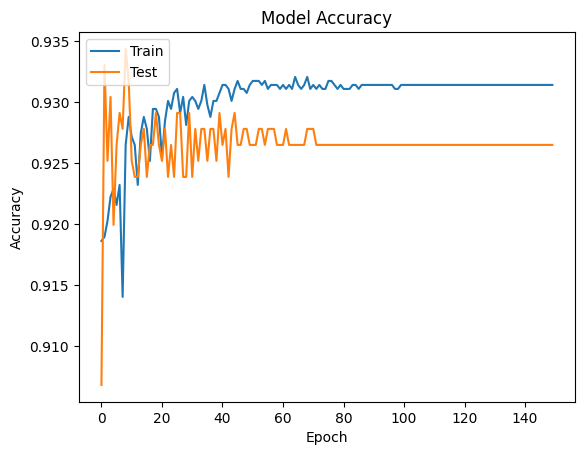

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

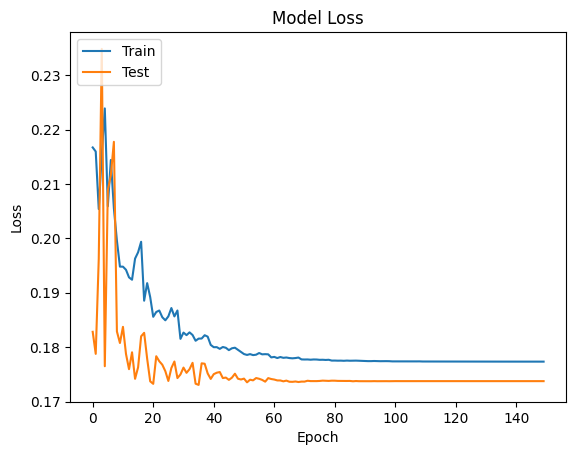

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Analysis
 The first plot illustrates how both training and validation accuracies evolve over epochs, offering a visual representation of how well the model learns from the data. Initially, we can see an upward trend in both training and validation accuracy as the model learns patterns from the training data. However, it starts to plateau while training accuracy continues to rise, which could indicate overfitting.

The second plot presents the training and validation loss trends across epochs. A decreasing loss signifies that the model is improving in terms of minimizing errors during training but it also starts to plateau while training loss decreases, which suggests overfitting as well.

#h. Show the application of Dropout Regularization


In [ ]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [ ]:
def create_dropout_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
dropout_model = create_dropout_model()

In [ ]:
history = dropout_model.fit(X_train_scaled, y_train_encoded, epochs=100, validation_data=(X_test_scaled, y_test_encoded), batch_size=16, verbose=1)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8308 - loss: 0.3929 - val_accuracy: 0.9252 - val_loss: 0.1747
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9195 - loss: 0.2156 - val_accuracy: 0.9252 - val_loss: 0.1717
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9248 - loss: 0.2071 - val_accuracy: 0.9265 - val_loss: 0.1723
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9282 - loss: 0.1830 - val_accuracy: 0.9278 - val_loss: 0.1729
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9251 - loss: 0.1962 - val_accuracy: 0.9265 - val_loss: 0.1740
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9210 - loss: 0.1981 - val_accuracy: 0.9304 - val_loss: 0.1758
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9243 - loss: 0.2035 - val_accuracy: 0.9304 - val_loss: 0.1741
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9285 - loss: 0.2037 - val_accu

In [ ]:
score = dropout_model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print("Model accuracy: %.2f%%" % (score[1] * 100))

Model accuracy: 92.78%


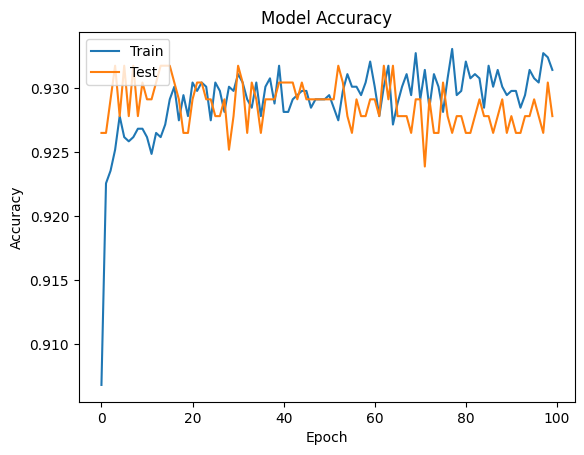

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Analysis

The model created using dropout layers seems to perform quite well, achieving an accuracy of 92.78% on the test set after training for 100 epochs. Looking at the plot of model accuracy over epochs, we can see that both the training and validation accuracy initially increase steadily, indicating that the model is learning the patterns in the data. However, after around 20 epochs, the validation accuracy appears to plateau while the training accuracy continues to improve. This suggests that the model might start overfitting to the training data as the number of epochs increases.

#i. Show the application of Dropout on the visible layer

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)

In [ ]:
def create_model():
    input_dim = X_train.shape[1]
    model = Sequential()
    model.add(Dense(60, input_shape=(input_dim,), activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(1, activation='sigmoid'))

    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
   print(model.summary())


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_121 (Dense)                    │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420 (1.64 KB)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 211 (848.00 B)

None


In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
try:
    results = cross_val_score(pipeline, X_train, encoded_y_train, cv=kfold)
    print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
except Exception as e:
    print("An error occurred:", e)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Visible: 82.12% (4.37%)


##Analysis

The model is compiled with binary cross-entropy loss and stochastic gradient descent (SGD) optimizer with momentum. Standard scaling is applied to the features, and a pipeline is created to include standardization and the neural network model. A 10-fold stratified cross-validation is performed using cross_val_score.

#j. Show the application of Dropout on the hidden layer


In [ ]:
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Hidden Layer with Dropout: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Hidden Layer with Dropout: 83.30% (3.90%)


##Analysis

Calculated the cross-validated accuracy of the neural network model using the entire dataset and the stratified k-fold cross-validation technique. The inclusion of dropout regularization in the hidden layers is significant as it helps prevent overfitting by randomly dropping a fraction of neurons during training.

#k. Show the application of a time-based learning rate schedule


In [ ]:
epochs = 150
learning_rate = 0.1
decay_rate = learning_rate / epochs

In [ ]:
sgd = SGD(learning_rate=learning_rate, decay=decay_rate, momentum=0.8)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
model = create_model()

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=epochs, validation_data=(X_test_scaled, y_test_encoded), batch_size=10, verbose=1)

Epoch 1/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9027 - loss: 0.2361 - val_accuracy: 0.9278 - val_loss: 0.2014
Epoch 2/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9121 - loss: 0.2163 - val_accuracy: 0.9304 - val_loss: 0.1936
Epoch 3/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.2133 - val_accuracy: 0.9199 - val_loss: 0.1924
Epoch 4/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9304 - loss: 0.1835 - val_accuracy: 0.9081 - val_loss: 0.2189
Epoch 5/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9235 - loss: 0.2047 - val_accuracy: 0.9291 - val_loss: 0.1807
Epoch 6/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9183 - loss: 0.2120 - val_accuracy: 0.9291 - val_loss: 0.1758
Epoch 7/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.1927 - val_accuracy: 0.9331 - val_loss: 0.1754
Epoch 8/150
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9241 - loss: 0.1952 - val_accu

In [ ]:
score = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print("Model accuracy: %.2f%%" % (score[1] * 100))

Model accuracy: 92.65%


##Analysis

The training results show a gradual improvement in accuracy and loss metrics across epochs. Initially, the model achieved an accuracy of 90.27% and a loss of 0.2361, which improved to an accuracy of 93.12% and a loss of 0.1883 after 150 epochs. This indicates that the model is learning effectively from the training data and is able to generalize well on the validation data, achieving a final accuracy of 92.65% on the test set.

The learning curve shows a smooth decrease in loss and increase in accuracy, which suggests that the model is converging properly without signs of overfitting or underfitting.

#l.Show the application of a drop-based learning rate schedule

In [ ]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lrate

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, validation_data=(X_test_scaled, y_test_encoded), batch_size=10, callbacks=callbacks_list, verbose=1)

Epoch 1/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9345 - loss: 0.1976 - val_accuracy: 0.9278 - val_loss: 0.1806 - learning_rate: 0.1000
Epoch 2/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9224 - loss: 0.2178 - val_accuracy: 0.9199 - val_loss: 0.1869 - learning_rate: 0.1000
Epoch 3/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9342 - loss: 0.2075 - val_accuracy: 0.9291 - val_loss: 0.2367 - learning_rate: 0.1000
Epoch 4/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9254 - loss: 0.2184 - val_accuracy: 0.9278 - val_loss: 0.1920 - learning_rate: 0.1000
Epoch 5/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9298 - loss: 0.1920 - val_accuracy: 0.9239 - val_loss: 0.2427 - learning_rate: 0.1000
Epoch 6/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9126 - loss: 0.2228 - val_accuracy: 0.9265 - val_loss: 0.1768 - learning_rate: 0.1000
Epoch 7/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9271 - loss: 0.1903 - 

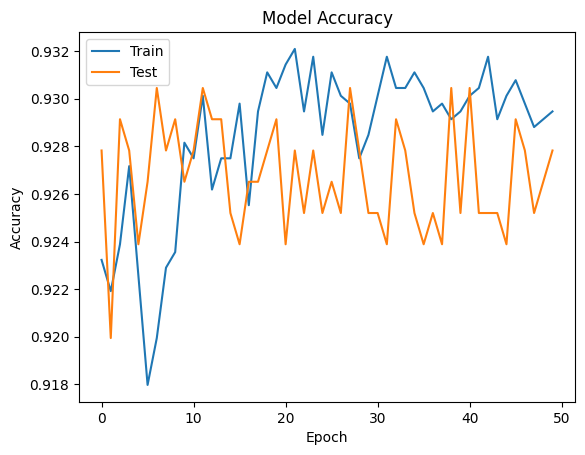

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

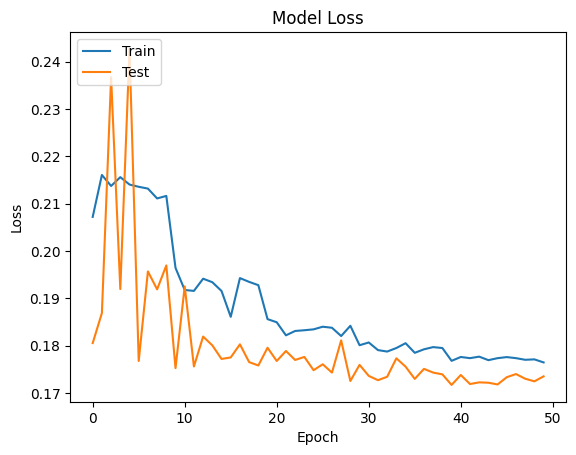

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Analysis
The training accuracy steadily increases over epochs, reaching around 92-93% accuracy. The validation accuracy follows a similar trend, indicating that the model generalizes well to unseen data. There are no signs of overfitting as the validation accuracy tracks closely with the training accuracy throughout the epochs.


The training loss decreases consistently over epochs, which is expected as the model learns to minimize its error. The validation loss also decreases initially but shows a slight increase towards the later epochs, which could indicate some degree of overfitting or convergence to a local minimum.

#Conclusion

Through the process of completing this activity, I gained valuable insights into saving models and implementing learning rate schedules in deep learning activities. One of the significant learnings was understanding the importance of saving models at different stages of training, which allows for easy retrieval and reusability. I began with preprocessing the dataset, followed by designing and training a neural network model. Also, I explored the process of saving models in different formats such as HDF5, JSON, and YAML. Additionally, I implemented checkpointing mechanisms to track model improvements and save only the best-performing model. Along the way, I also explored the application of dropout regularization on both visible and hidden layers, showing its significance in preventing model overfitting. Moreover, I demonstrated the implementation of time-based and drop-based learning rate schedules to optimize the training process further. <br>
<br>
The chosen dataset, while initially uncomplicated, presented challenges that needed a tough approach to preprocessing and model architecture design. Despite encountering some struggles and errors during the assignment, such as initially not saving models at crucial checkpoints and facing challenges with learning rate adjustments, I managed to overcome these problems through careful debugging and researching. One of the primary struggles encountered was in fine-tuning the hyperparameters and implementing regularization techniques effectively to mitigate overfitting tendencies.<br>
<br>
Overall, this activity was a valuable learning experience that enhanced my understanding of model saving techniques and learning methodologies in deep learning, gaining me valuable skills for tackling real-world machine learning challenges.